In [1]:
from pandas import read_pickle, DataFrame, set_option

In [2]:
data = read_pickle("../data/data_all_features.pkl")

X = data.get("X_train")
y = data.get("y_train")
X_test = data.get("X_test")
feature_names = data.get("feature_names")
categorical = data.get("categorical")
numerical = data.get("numerical")
id_numeration_train = data.get("id_numeration_train")
id_numeration_test = data.get("id_numeration_test")

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for index, value in enumerate(importance):
     print(f"Feature: {feature_names[index]: <60} Score: {value: <20}")

Feature: visitNumber                                                  Score: 241398.5695158954   
Feature: totals_bounces                                               Score: 3820316.3344677486  
Feature: totals_hits                                                  Score: -40854.78241172148  
Feature: totals_newVisits                                             Score: -1706258.31214499   
Feature: totals_pageviews                                             Score: 1252671.7787763977  
Feature: trafficSource_adwordsClickInfo.page                          Score: -52345.269480622024 
Feature: trafficSource_isTrueDirect                                   Score: -590202.1564425641  
Feature: device_isMobile                                              Score: -167948.3128031859  
Feature: channelGrouping_Affiliates                                   Score: -1492471.9244128244 
Feature: channelGrouping_Direct                                       Score: 4575679.924563097   
Feature: channelGrou

In [5]:
feature_importance_dataframe = DataFrame(importance, columns=["importance"])
feature_importance_dataframe["feature_name"] = feature_names
feature_importance_dataframe["importance_abs"] = feature_importance_dataframe["importance"].abs()

feature_importance_dataframe.sort_values(by=['importance_abs'], inplace=True, ascending=False)

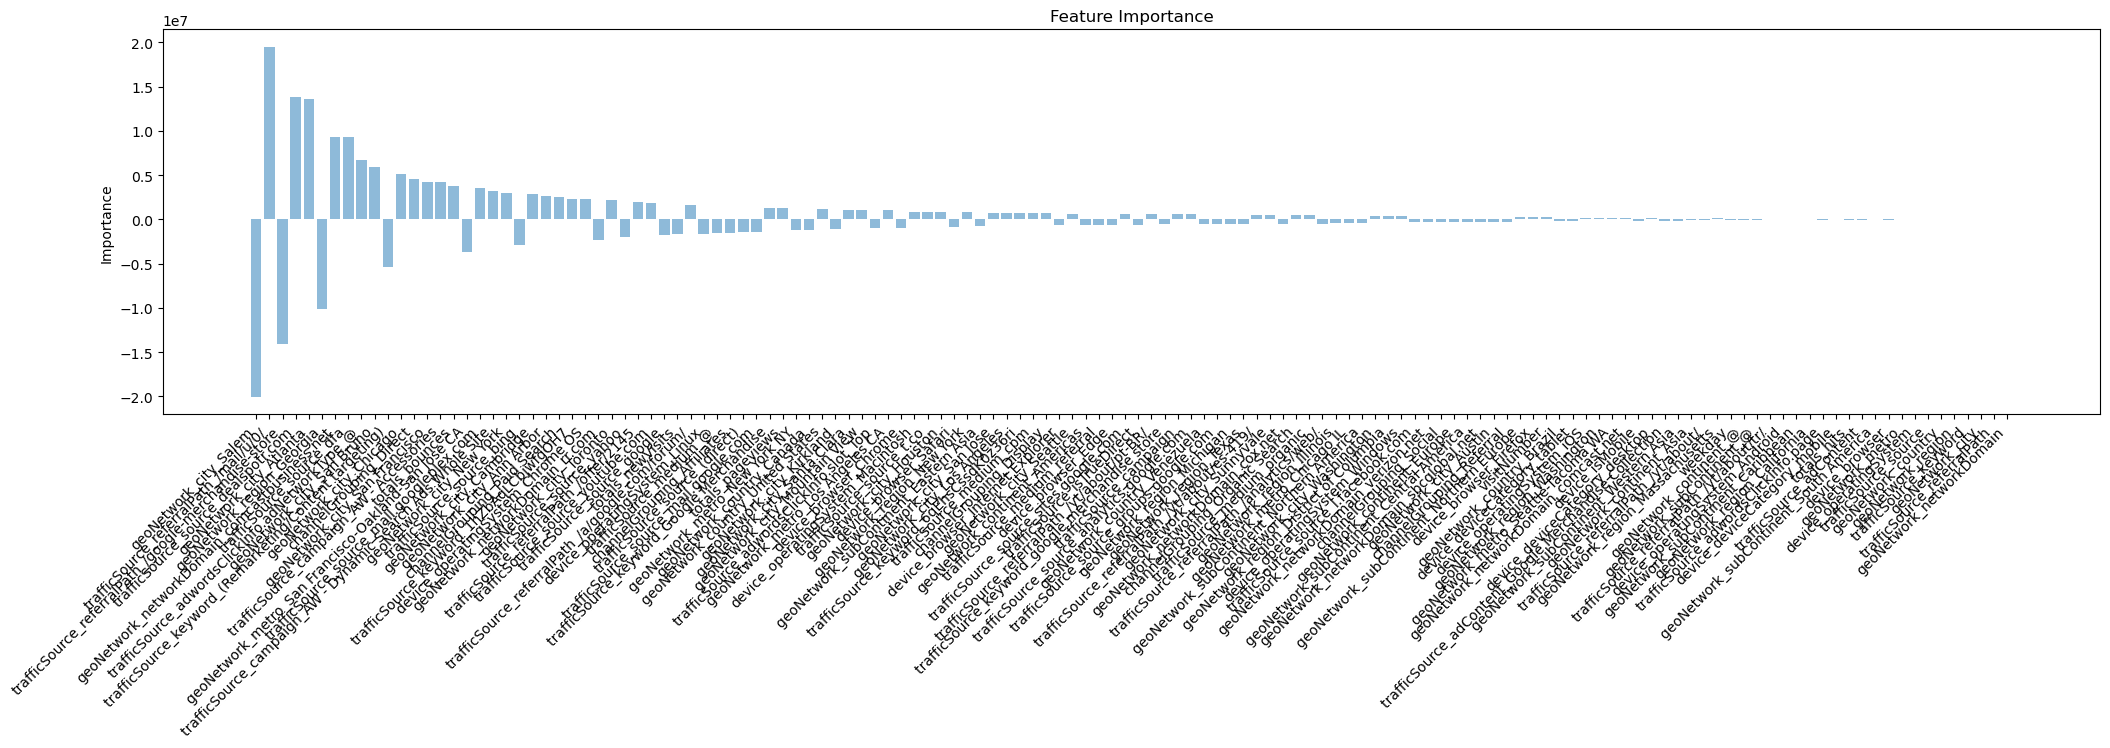

In [6]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(feature_names))
importance = feature_importance_dataframe["importance"].values

fig, ax = plt.subplots(figsize=(25, 5))
plt.bar(y_pos, importance, align='center', alpha=0.5)
plt.xticks(y_pos, feature_importance_dataframe["feature_name"].values)
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha="right")

plt.show()

In [11]:
top_features = feature_importance_dataframe.iloc[:10]

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (20,) and arg 1 with shape (10,).

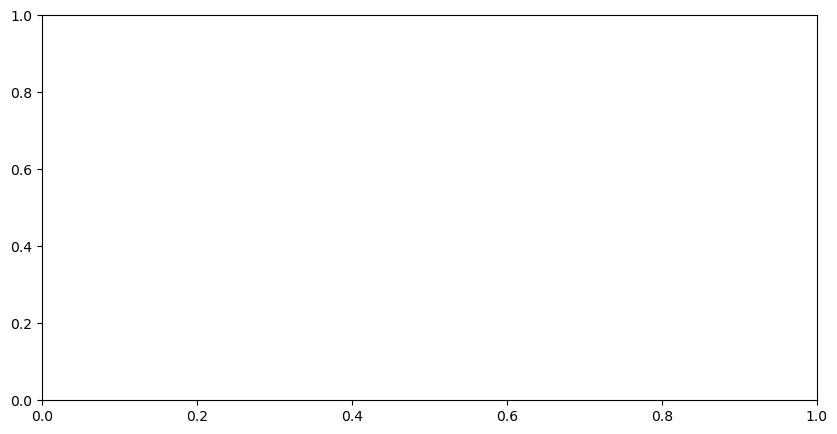

In [10]:
y_pos = np.arange(20)
importance_top = top_features["importance"].values

fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(y_pos, importance_top, align='center', alpha=0.5)
plt.xticks(y_pos, top_features["feature_name"].values)
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha="right")

plt.show()